In [2]:
import hashlib
import pathlib
import datetime
import warnings

from dotenv import load_dotenv
from IPython.display import Markdown, display
from langchain_chroma import Chroma
from langchain_anthropic import ChatAnthropic
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.messages import HumanMessage

from persuasion_bias.config import logging
from persuasion_bias.rag.graphs import BiasExplanation

warnings.filterwarnings("ignore")
_ = load_dotenv()
config_file = pathlib.Path("persuasion_bias") / "config" / "log-config.yaml"
callback = logging.LogCallback()
callback.reconfigure_from_file(config_file=config_file)
log = callback.logger

[INFO @sentence_transformers.SentenceTransformer]: Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
[INFO @LogCallback]: CompiledStateGraph


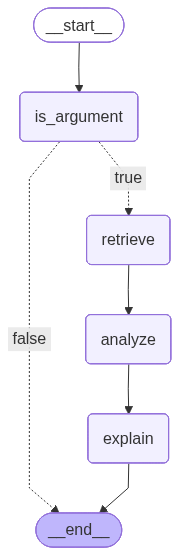

In [3]:
kwargs = {
    "model": "sentence-transformers/all-MiniLM-L6-v2",
    "model_kwargs": {"device": "cpu"},
    "encode_kwargs": {"normalize_embeddings": True},
}
model_name = "claude-3-5-haiku-20241022"
embedding = HuggingFaceEmbeddings(**kwargs)
llm = ChatAnthropic(temperature=0, model_name=model_name)
agent = BiasExplanation(llm=llm, embedding=embedding, vectorstore=Chroma)
graph = agent.graph_fabricate()

log.info(graph.__class__.__name__)
graph

In [4]:
strftime = datetime.datetime.now().strftime("%Y/%m/%d-%H:%M:%S")
sha1 = hashlib.sha1(strftime.encode())
config = {"configurable": {"thread_id": sha1}}

query = input("You: ")
while query != r"\q":
    response = graph.invoke(
        {
            "messages": [HumanMessage(content=query)],
            "query": query,
        },
        config=config,
    )
    *_, last_message = response.get("messages")
    log.info(last_message.content)

    query = input("You: ")


[INFO @httpx]: HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
[INFO @LogCallback]: Hi there! I'd be happy to hear your thoughts about technology. What specific point or perspective would you like to discuss?
[INFO @httpx]: HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
[INFO @LogCallback]: Hi Joe! It seems like you were about to make an argument about technology, but you got sidetracked. Would you like to share what point you wanted to discuss about technology?
[INFO @httpx]: HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
[INFO @chromadb.telemetry.product.posthog]: Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
[INFO @httpx]: HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
[INFO @httpx]: HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
[INFO @LogCallback]: I have generated a bias explan

In [5]:
session = graph.get_state(config=config).values

In [6]:
for msg in session.get("messages"):
    msg.pretty_print()

================================ Human Message =================================

hey, i have an argument to make about technology
================================== Ai Message ==================================

Hi there! I'd be happy to hear your thoughts about technology. What specific point or perspective would you like to discuss?
================================ Human Message =================================

i'm joe by the way. Wait what was my argument about?
================================== Ai Message ==================================

Hi Joe! It seems like you were about to make an argument about technology, but you got sidetracked. Would you like to share what point you wanted to discuss about technology?
================================ Human Message =================================

yes. I think self driven cars could be dangerous
================================== Ai Message ==================================

True
================================== Ai Message ======

In [7]:
log.info(session["retrieval"])

[INFO @LogCallback]: Claim: Self-driving cars will not be safe enough to fully replace human drivers.
Argument: While the prospect of self-driving cars is exciting, self-driving cars are not currently reliable or advanced enough to fully replace human drivers, and doing so could put many lives at risk. According to an MIT study, self-driving cars today only log an average of about 50 miles between "disengagements" where the human driver has to take over control.  At highway speeds, that means a human would have to intervene once every 30 minutes to avoid an accident.  
Self-driving cars also struggle in challenging driving conditions like heavy rain, snow, or at night—precisely the conditions where accidents are most likely  to occur according to the Insurance Institute for Highway Safety. They can also be easily confused by unexpected obstacles like construction zones, emergency vehicles, or complicated intersections.   Researchers at Stanford found that self-driving cars took up to 1

<hr>

In [8]:
log.info(session["analysis"])

[INFO @LogCallback]: {'cialdini_principles': [{'principle': 'Commitment/Consistency', 'confidence': 0.3, 'evidence': 'simple statement suggesting potential danger without elaboration', 'severity': 'low'}], 'logical_fallacies': ['hasty generalization'], 'emotional_manipulation_score': 0.1, 'credibility_issues': ['lack of substantive evidence'], 'target_audience_analysis': 'General public with minimal technical understanding of autonomous vehicles', 'overall_bias_score': 0.4}


In [9]:
display(Markdown(session["explanation"]))

# Bias Analysis: Self-Driving Car Safety Argument

## Overall Bias Assessment
The analysis reveals a low to moderate bias score of 0.4, indicating a statement that contains subtle persuasive elements but lacks substantial argumentative depth.

## Cialdini Principles Detected

### Commitment/Consistency Principle (Low Confidence: 0.3)
The statement demonstrates a basic psychological tendency to maintain consistency in beliefs. In this case, the speaker:
- Makes a broad claim about self-driving car danger
- Uses a definitive tone suggesting pre-existing belief
- Lacks nuanced exploration of the topic

**Example of Principle in Action:**
- Quick judgment based on limited information
- Reinforcing a potentially predetermined perspective

## Logical Fallacies

### Hasty Generalization
The argument commits a classic logical fallacy by:
- Drawing a sweeping conclusion about self-driving car safety
- Providing no specific evidence or detailed reasoning
- Oversimplifying a complex technological issue

## Emotional Manipulation Analysis

### Low Emotional Manipulation Score (0.1)
The statement shows minimal intentional emotional manipulation, characterized by:
- Direct, straightforward language
- Absence of emotionally charged terminology
- Neutral tone despite the provocative claim

## Credibility Concerns

### Lack of Substantive Evidence
Critical credibility issues include:
- No supporting data or research references
- Absence of specific safety concerns
- Unsubstantiated generalization about technology

## Recommended Critical Thinking Approach

1. Seek comprehensive research on autonomous vehicle safety
2. Examine statistical evidence from multiple sources
3. Understand technological safety mechanisms
4. Avoid making broad generalizations
5. Consider nuanced perspectives on emerging technologies

## Conclusion
While the statement raises a potential concern, it lacks the analytical depth required for a meaningful argument about self-driving car safety.